In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
Startups=pd.read_csv("C:/Users/icon/Downloads/50_Startups.csv")
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
Startups=Startups[["R&D Spend","Administration","Marketing Spend","Profit"]]
Startups

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [4]:
#check for missing values
Startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [5]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


## Correlation Matrix

In [6]:
Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
d1=Startups.rename({'Marketing Spend':'Marketing_Spend'},axis=1)
Startups=d1.rename({'R&D Spend':'RandD_Spend'},axis=1)
Startups.head(2)

,RandD_Spend,Administration,Marketing_Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


## Scatter plot between Variables and Histogram

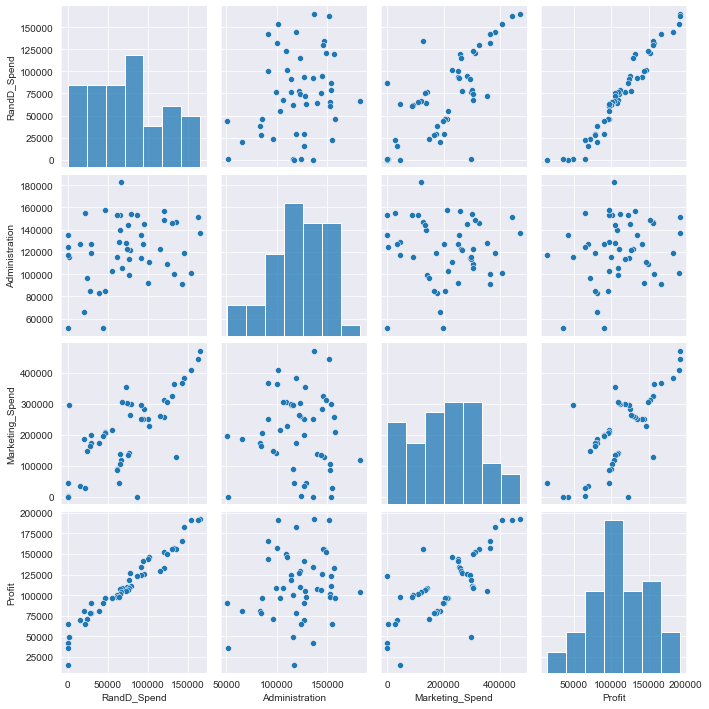

In [8]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Startups)

<AxesSubplot:>

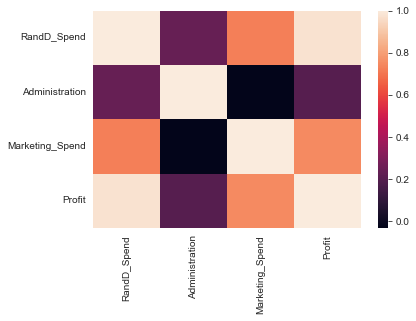

In [9]:
sns.heatmap(Startups.corr())

## Preparing a Model

In [11]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data=Startups).fit()

In [12]:
#Coefficients
model.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
RandD_Spend        17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RandD_Spend        2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

## Simple Linear Regression Model

In [15]:
ml_A=smf.ols('Profit~Administration',data =Startups).fit()  
#t and p-Values
print(ml_A.tvalues, '\n', ml_A.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [16]:
ml_M=smf.ols('Profit~Marketing_Spend',data =Startups).fit()  
#t and p-Values
print(ml_M.tvalues, '\n', ml_M.pvalues) 

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [17]:
ml_AM=smf.ols('Profit~Administration+Marketing_Spend',data =Startups).fit()  
#t and p-Values
print(ml_AM.tvalues, '\n', ml_AM.pvalues) 

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


## Calculating VIF

In [18]:
rsq_RandD_Spend = smf.ols('RandD_Spend~Administration+Marketing_Spend',data=Startups).fit().rsquared  
vif_RandD_Spend = 1/(1-rsq_RandD_Spend)

rsq_Administration = smf.ols('Administration~RandD_Spend+Marketing_Spend',data=Startups).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

rsq_Marketing_Spend = smf.ols('Marketing_Spend~RandD_Spend+Administration',data=Startups).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend)


# Storing vif values in a data frame
d1 = {'Variables':["RandD_Spend","Administration","Marketing_Spend"],'VIF':[vif_RandD_Spend,vif_Administration,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RandD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


# Residual Analysis 

## Test for Normality of Residuals(Q-Q Plot)

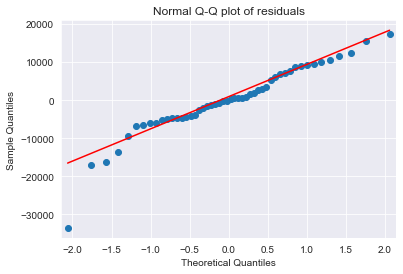

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
residuals=model.resid
residuals

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

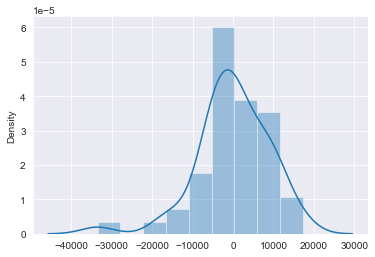

In [21]:
sns.distplot(residuals)

## Residual Plot for Homoscedasticity

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

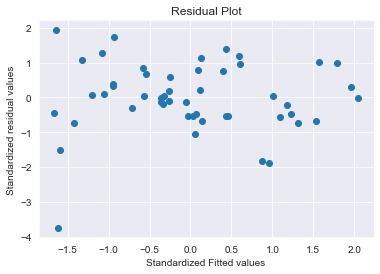

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


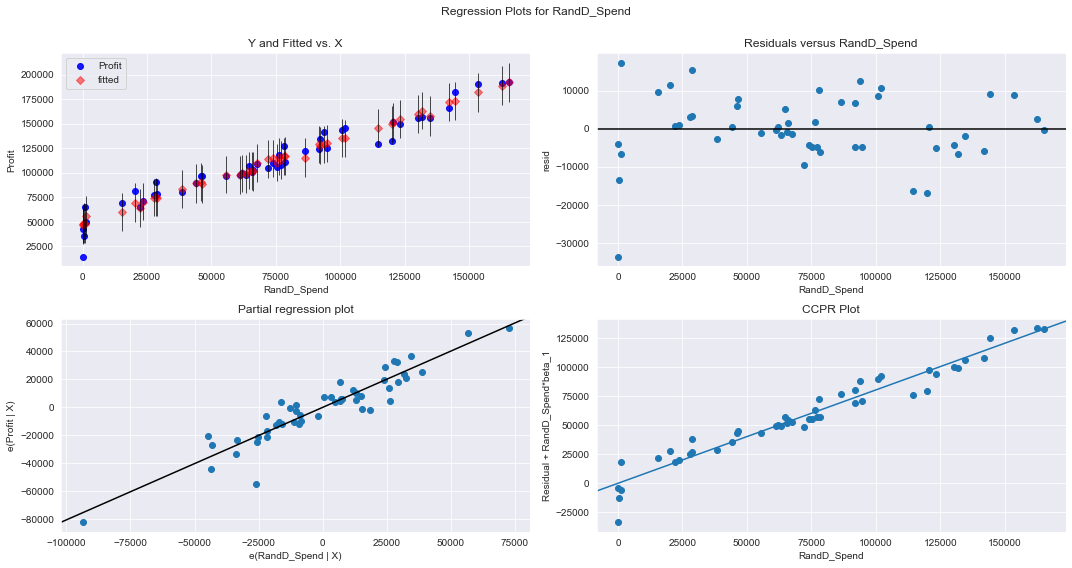

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RandD_Spend", fig=fig)
plt.show()

eval_env: 1


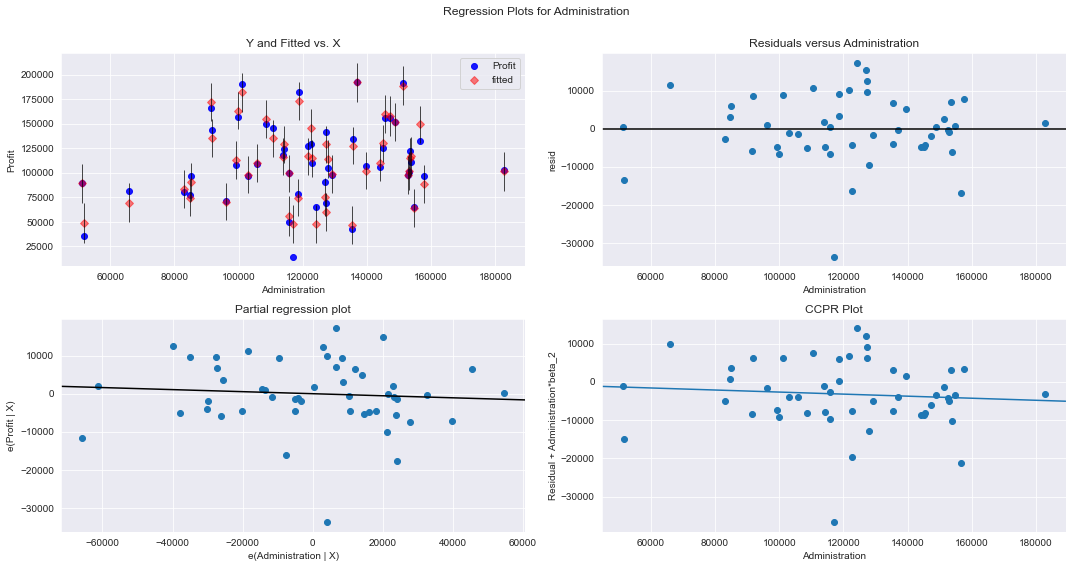

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


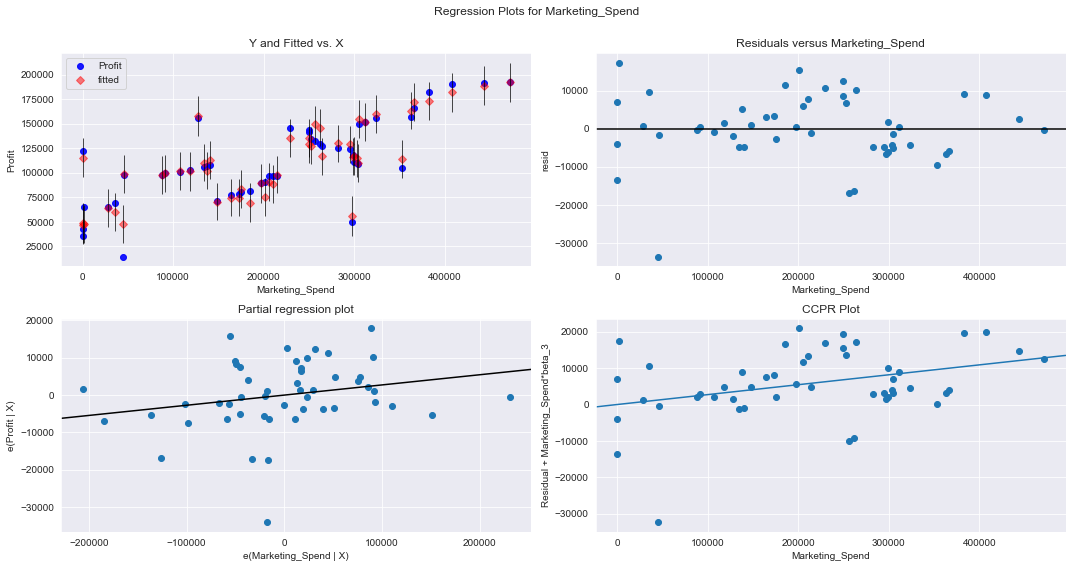

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook's Distance

In [28]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

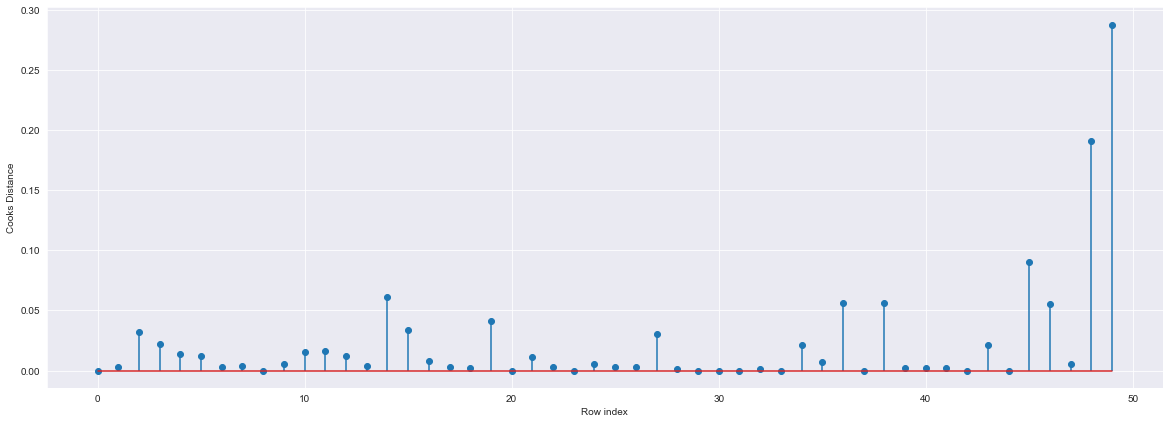

In [29]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432584)

## High Influence Point 

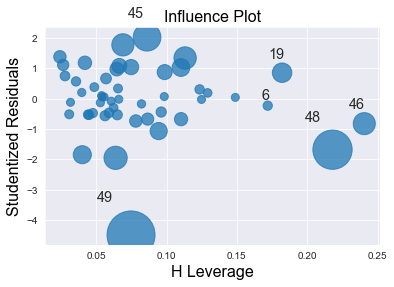

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

### From the above plot, it is evident that data point 49 is the influencers

In [32]:
Startups[Startups.index.isin([49])]

,RandD_Spend,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [34]:
#See the differences in RandD_spend and other variable values
Startups.head()

,RandD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Improving the Model

In [35]:
#Load the data
Startups_new=pd.read_csv("C:/Users/icon/Downloads/50_Startups.csv")
Startups_new=Startups[["RandD_Spend","Administration","Marketing_Spend","Profit"]]

In [36]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Startups1=Startups_new.drop(Startups_new.index[[49]],axis=0).reset_index()
Startups1

,index,RandD_Spend,Administration,Marketing_Spend,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [37]:
#Drop the original index
Startups1=Startups1.drop(['index'],axis=1)
Startups1

,RandD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## Build Model 

In [38]:
# generate R-Squared and AIC values
final_ml= smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data =Startups1).fit()

In [39]:
(final_ml.rsquared,final_ml.aic)

(0.9613162435129847, 1020.5652974526367)

## Cook's Distance

In [40]:
model_influence = final_ml.get_influence()
(c_, _) = model_influence.cooks_distance

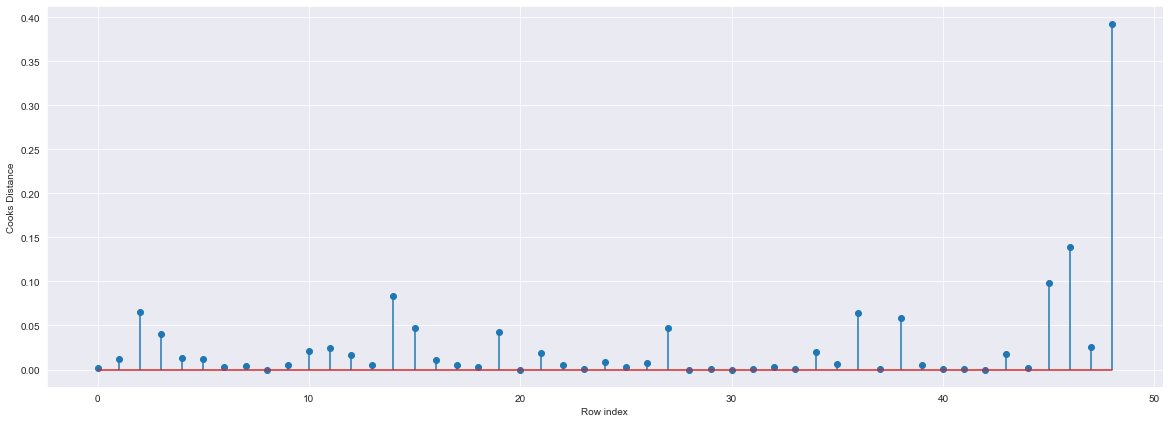

In [41]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startups1)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [42]:
#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(48, 0.39274420556321316)

In [43]:
#Drop 48 observations
Startups2=Startups1.drop(Startups1.index[[48]],axis=0)
Startups2

,RandD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [44]:
#Reset the index and re arrange the row values
Startups3=Startups2.reset_index()

In [45]:
Startups4=Startups3.drop(['index'],axis=1)
Startups4

,RandD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [46]:
#Build the model on the new data
final_ml_= smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data =Startups4).fit()

In [47]:
#Again check for influencers
model_influence_ = final_ml_.get_influence()
(c_, _) = model_influence_.cooks_distance

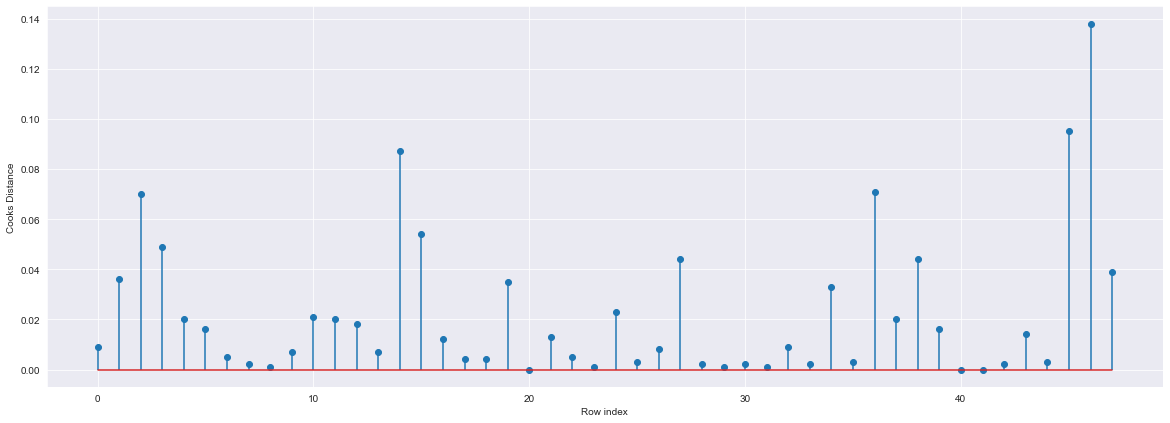

In [48]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startups4)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [49]:
#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(46, 0.13829133994334386)

## Since the value is <1 , we can stop the diagnostic process and finalize the model

In [50]:
(final_ml.rsquared,final_ml.aic)

(0.9613162435129847, 1020.5652974526367)

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RandD_Spend', ylabel='Profit'>

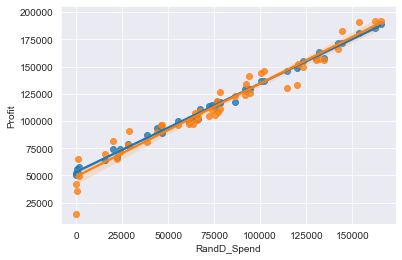

In [51]:
sns.regplot(Startups.RandD_Spend,final_ml_.predict(Startups))
sns.regplot(Startups.RandD_Spend,Startups.Profit)

In [52]:
pred_y=final_ml_.predict(Startups)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
48     56248.562734
49     52450.878563


## Predicting for New Data 

In [53]:
#New data for prediction
new_data=pd.DataFrame({"RandD_Spend":82471,"Administration":114562,"Marketing_Spend":228985},index=[1])

In [54]:
pred_y=final_ml_.predict(new_data)
pred_y

1    120820.232224
dtype: float64